### `ENVIROMENT SETUP`

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from datetime import datetime

import seaborn as sns
sns.set_style("whitegrid")

### `LOADING DATA`

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
store=pd.read_csv('stores.csv')
feature=pd.read_csv('features.csv')

In [3]:
# Train data
train.drop_duplicates(inplace=True)
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
# Test data
test.drop_duplicates(inplace=True)
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [5]:
# Store data
store.drop_duplicates(inplace=True)
store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [6]:
# Features data
feature.drop_duplicates(inplace=True)
feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [7]:
# Merging train and features df
merge_df = pd.merge(train,feature, on=['Store','Date', 'IsHoliday'], how='inner')

merge_dft = pd.merge(test,feature, on=['Store','Date', 'IsHoliday'], how='inner')

In [8]:
# Merging above df and stores df
train_df = pd.merge(merge_df,store, on=['Store'], how='inner')

test_df = pd.merge(merge_dft,store, on=['Store'], how='inner')

In [9]:
# final train df
train_df.set_index('Date', inplace=True)
test_df.set_index('Date', inplace=True)

In [10]:
# Calculating Year from Date index
train_df['Year'] = pd.DatetimeIndex(train_df.index).year
test_df['Year'] = pd.DatetimeIndex(test_df.index).year

# Calculating Year from Date index
train_df['Quarter'] = pd.DatetimeIndex(train_df.index).quarter
test_df['Quarter'] = pd.DatetimeIndex(test_df.index).quarter

# Calculating Year from Date index
train_df['Month'] = pd.DatetimeIndex(train_df.index).month
test_df['Month'] = pd.DatetimeIndex(test_df.index).month

# Calculating Year from Date index
train_df['Week'] = pd.DatetimeIndex(train_df.index).week
test_df['Week'] = pd.DatetimeIndex(test_df.index).week

In [11]:
train_df.tail()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Quarter,Month,Week
Date,,,,,,,,,,,,,,,,,,,
2012-10-26,45,93,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,2012,4,10,43
2012-10-26,45,94,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,2012,4,10,43
2012-10-26,45,95,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,2012,4,10,43
2012-10-26,45,97,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,2012,4,10,43
2012-10-26,45,98,1076.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,2012,4,10,43


In [12]:
test_df.tail()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Quarter,Month,Week
Date,,,,,,,,,,,,,,,,,,
2013-07-26,45,93,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221,2013,3,7,30
2013-07-26,45,94,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221,2013,3,7,30
2013-07-26,45,95,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221,2013,3,7,30
2013-07-26,45,97,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221,2013,3,7,30
2013-07-26,45,98,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221,2013,3,7,30


In [13]:
test_df.CPI.isnull().sum()

38162

In [14]:
test_df.Unemployment.isnull().sum()

38162

In [15]:
print('*'* 100)
print('Store IDs in train data: ', train_df.Store.unique())
print()
print('Store IDs in test data: ', test_df.Store.unique())
print('*'* 100)

****************************************************************************************************
Store IDs in train data:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]

Store IDs in test data:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
****************************************************************************************************


In [16]:
print('*'* 100)
print('Departments in train data: ', train_df.Dept.unique())
print()
print('Departments in test data: ', test_df.Dept.unique())
print('*'* 100)

****************************************************************************************************
Departments in train data:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 44 45 46 47 48 49 51 52
 54 55 56 58 59 60 67 71 72 74 79 80 81 82 83 85 87 90 91 92 93 94 95 97
 98 78 96 99 77 39 50 43 65]

Departments in test data:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 44 46 48 49 52 55 56 58
 59 60 67 71 72 74 79 80 81 82 83 85 87 90 91 92 93 94 95 96 97 98 99 54
 45 47 77 39 50 51 43 78 65]
****************************************************************************************************


### `DATA STRUCTURE`

In [17]:
train_df.shape

(421570, 19)

In [18]:
test_df.shape

(115064, 18)

In [19]:
# Checking data types and missing values
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 16.5+ MB


In [20]:
# Checking data types and missing values
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 16.5+ MB


In [21]:
# Checking stats for train data
train_df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Year,Quarter,Month,Week
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739,2010.968591,2.482767,6.449510,25.826762
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328,0.796876,1.071341,3.243217,14.151887
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000,2010.000000,1.000000,1.000000,1.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000,2010.000000,2.000000,4.000000,14.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000,2011.000000,2.000000,6.000000,26.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000,2012.000000,3.000000,9.000000,38.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,2012.000000,4.000000,12.000000,52.000000


In [22]:
# Checking stats for test data
test_df.describe()

,Store,Dept,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Year,Quarter,Month,Week
count,115064.000000,115064.000000,115064.000000,115064.000000,114915.000000,86437.000000,105235.000000,102176.000000,115064.000000,76902.000000,76902.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000
mean,22.238207,44.339524,53.941804,3.581546,7689.216439,3734.051729,2403.088666,3356.219071,3922.681189,176.961347,6.868733,136497.688921,2012.767182,2.234513,5.729855,23.050963
std,12.809930,30.656410,18.724153,0.239442,10698.760716,8323.495014,13767.939313,7570.501545,19445.150745,41.239967,1.583427,61106.926438,0.422629,1.145134,3.590331,15.750407
min,1.000000,1.000000,-7.290000,2.872000,-2781.450000,-35.740000,-179.260000,0.220000,-185.170000,131.236226,3.684000,34875.000000,2012.000000,1.000000,1.000000,1.000000
25%,11.000000,18.000000,39.820000,3.431000,1966.460000,180.350000,15.100000,155.460000,1309.300000,138.402033,5.771000,93638.000000,2013.000000,1.000000,3.000000,10.000000
50%,22.000000,37.000000,54.470000,3.606000,4842.290000,742.590000,78.260000,840.940000,2390.430000,192.304445,6.806000,140167.000000,2013.000000,2.000000,5.000000,20.000000
75%,33.000000,74.000000,67.350000,3.766000,9439.140000,2735.670000,272.580000,3096.920000,4227.270000,223.244532,8.036000,202505.000000,2013.000000,3.000000,7.000000,30.000000
max,45.000000,99.000000,101.950000,4.125000,103184.980000,71074.170000,149483.310000,65344.640000,771448.100000,228.976456,10.199000,219622.000000,2013.000000,4.000000,12.000000,52.000000


#### `OBSERVATIONS:`
> 1. Weekly_Sales features show negative values which looks suspicious.
> 2. Temperature feature also have -ve value instances which is possible. 
> 3. Some of the MarkDown features have -ve values instances which needs to be investigated further.
> 4. Some features have outliers, needs treatment.
> 5. Some features are not available in test df.

### `REDUNDANT FEATURES`

In [23]:
# test_df.drop(['Unemployment', 'CPI'], axis=1, inplace=True)
# train_df.drop(['Unemployment', 'CPI'], axis=1, inplace=True)

### `DATA CLEANING`

In [24]:
# invalid records
cols = train_df.select_dtypes(['float64', 'int64']).columns.values

for x in cols:
    print(f'% of invalid records for {x}: {np.round((train_df[x] < 0).sum()/(len(train_df))* 100, 3)}')

% of invalid records for Store: 0.0
% of invalid records for Dept: 0.0
% of invalid records for Weekly_Sales: 0.305
% of invalid records for Temperature: 0.016
% of invalid records for Fuel_Price: 0.0
% of invalid records for MarkDown1: 0.0
% of invalid records for MarkDown2: 0.311
% of invalid records for MarkDown3: 0.061
% of invalid records for MarkDown4: 0.0
% of invalid records for MarkDown5: 0.0
% of invalid records for CPI: 0.0
% of invalid records for Unemployment: 0.0
% of invalid records for Size: 0.0
% of invalid records for Year: 0.0
% of invalid records for Quarter: 0.0
% of invalid records for Month: 0.0
% of invalid records for Week: 0.0


In [25]:
# Imputing invalid value
train_df.loc[train_df.Weekly_Sales < 0, 'Weekly_Sales'] = 0
train['Weekly_Sales'] = np.sqrt(train.Weekly_Sales)

train_df.loc[train_df.MarkDown2 < 0, 'MarkDown2'] = 0
train_df.loc[train_df.MarkDown3 < 0, 'MarkDown3'] = 0

In [26]:
# MISSING VALUES
for x in train_df.columns.values:
    print(f'Missing value count for {x}: {np.round(train_df[x].isnull().sum()/len(train_df)*100,3)}')

Missing value count for Store: 0.0
Missing value count for Dept: 0.0
Missing value count for Weekly_Sales: 0.0
Missing value count for IsHoliday: 0.0
Missing value count for Temperature: 0.0
Missing value count for Fuel_Price: 0.0
Missing value count for MarkDown1: 64.257
Missing value count for MarkDown2: 73.611
Missing value count for MarkDown3: 67.481
Missing value count for MarkDown4: 67.985
Missing value count for MarkDown5: 64.079
Missing value count for CPI: 0.0
Missing value count for Unemployment: 0.0
Missing value count for Type: 0.0
Missing value count for Size: 0.0
Missing value count for Year: 0.0
Missing value count for Quarter: 0.0
Missing value count for Month: 0.0
Missing value count for Week: 0.0


In [27]:
# Imputing missing values
train_df.loc[train_df.MarkDown1.isnull(), 'MarkDown1'] = 0
train_df.loc[train_df.MarkDown2.isnull(), 'MarkDown2'] = 0
train_df.loc[train_df.MarkDown3.isnull(), 'MarkDown3'] = 0
train_df.loc[train_df.MarkDown4.isnull(), 'MarkDown4'] = 0
train_df.loc[train_df.MarkDown5.isnull(), 'MarkDown5'] = 0

#### `MISSING IN TEST`

In [28]:
# MISSING VALUES
for x in test_df.columns.values:
    print(f'Missing value count for {x}: {np.round(test_df[x].isnull().sum()/len(test_df)*100,3)}')

Missing value count for Store: 0.0
Missing value count for Dept: 0.0
Missing value count for IsHoliday: 0.0
Missing value count for Temperature: 0.0
Missing value count for Fuel_Price: 0.0
Missing value count for MarkDown1: 0.129
Missing value count for MarkDown2: 24.879
Missing value count for MarkDown3: 8.542
Missing value count for MarkDown4: 11.201
Missing value count for MarkDown5: 0.0
Missing value count for CPI: 33.166
Missing value count for Unemployment: 33.166
Missing value count for Type: 0.0
Missing value count for Size: 0.0
Missing value count for Year: 0.0
Missing value count for Quarter: 0.0
Missing value count for Month: 0.0
Missing value count for Week: 0.0


### `ENCODING`

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_df.Type.unique())

train_df['Type'] = le.transform(train_df.Type)
test_df['Type'] = le.transform(test_df.Type)

In [30]:
train_df['IsHoliday'] = train_df.IsHoliday.astype('int64')
test_df['IsHoliday'] = test_df.IsHoliday.astype('int64')

### `OUTLIER TREATMENT`

In [31]:
from pyod.models.iforest import IsolationForest

out = IsolationForest(n_estimators=100, random_state=123, bootstrap=True, max_features=0.7)

X = train_df.drop('Weekly_Sales', axis=1)
y = train_df.Weekly_Sales

arr = out.fit_predict(X,y)
train_df['outlier'] = arr

C:\Users\happy\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [32]:
# Removing outliers from the dataset
train_df = train_df[train_df.outlier == -1]
train_df.drop('outlier', axis=1, inplace=True)

### `WEEKLY SALES DISTRIBUTION`

#### From below plot we can innfer that there are outliers in Weekly Sales feature.

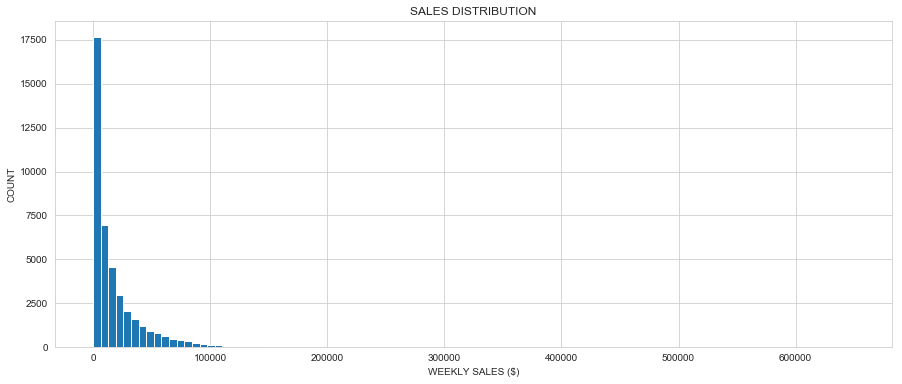

In [33]:
# Checking Weekly sales distribution across various walmart stores
plt.figure(figsize=(15,6));
train_df.Weekly_Sales.hist(bins=100);
plt.title('SALES DISTRIBUTION');
plt.xlabel('WEEKLY SALES ($)');
plt.ylabel('COUNT');

### `STORE SIZE VS STORE SALES`

#### From below plot we can infer that Store Sales are directly proportional to Store Size.

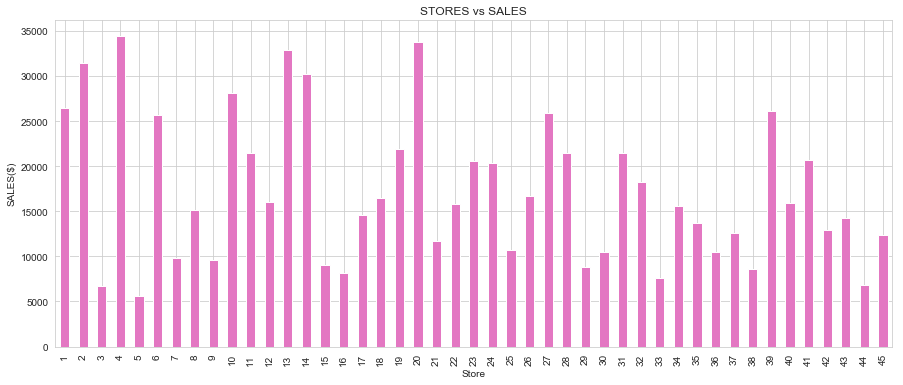

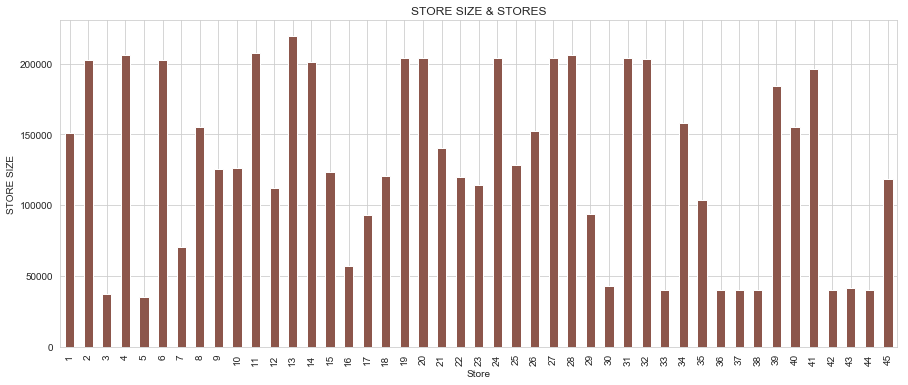

In [34]:
# Total Sales across various stores in descending order of sales
plt.figure(figsize=(15,6));
train_df.groupby('Store').Weekly_Sales.mean().plot(kind='bar', color='C6')
plt.title("STORES vs SALES");
plt.ylabel('SALES($)');

# Total Sales across various stores in descending order of sales
plt.figure(figsize=(15,6));
train_df.groupby('Store').Size.mean().plot(kind='bar', color='C5')
plt.title("STORE SIZE & STORES");
plt.ylabel('STORE SIZE');

### `WEEKLY SALES vs STORE DEPARTMENT`

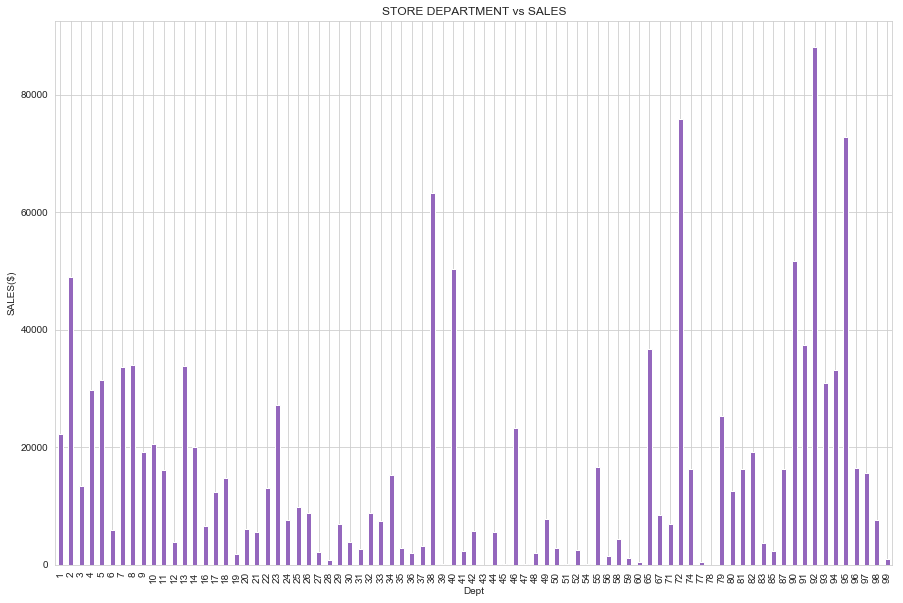

In [35]:
# Total Sales across various stores in descending order of sales
plt.figure(figsize=(15,10));
train_df.groupby('Dept').Weekly_Sales.mean().plot(kind='bar', color='C4')
plt.title("STORE DEPARTMENT vs SALES");
plt.ylabel('SALES($)');

### `AVERAGE SALES ON HOLIDAYS vs NORMAL`

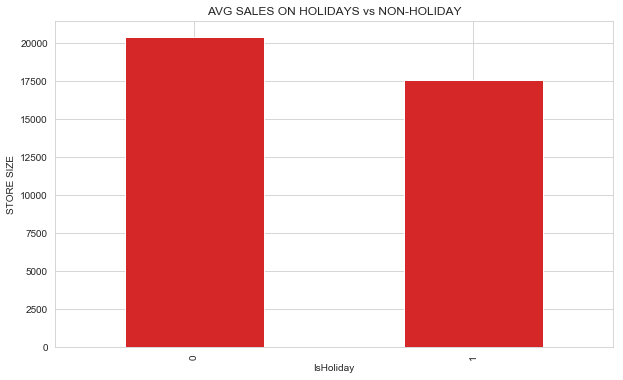

In [36]:
# Total Sales across various stores in descending order of sales
plt.figure(figsize=(10,6));
train_df.groupby('IsHoliday').Weekly_Sales.mean().plot(kind='bar', color='C3')
plt.title("AVG SALES ON HOLIDAYS vs NON-HOLIDAY");
plt.ylabel('STORE SIZE');

### `SALES OVER TIME`

#### `From plot below we can infer that there are peak sales seasons during last 2 months of year`

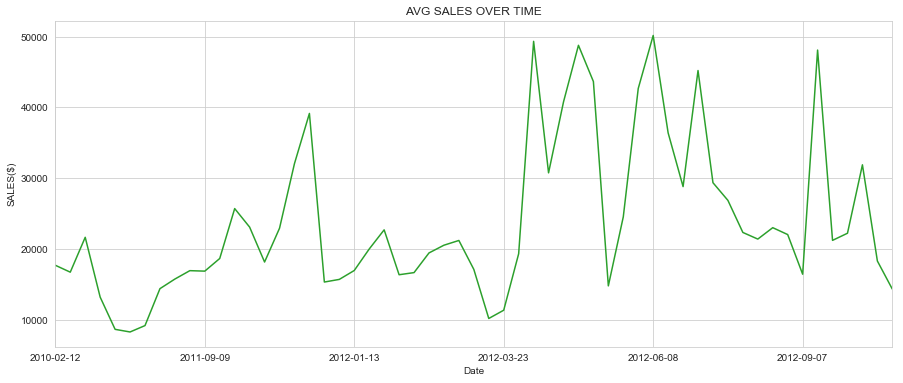

In [37]:
# Total Sales Overtime
plt.figure(figsize=(15,6));
train_df.groupby(train_df.index).Weekly_Sales.mean().plot(color='C2');
plt.title("AVG SALES OVER TIME");
plt.xticks(labels=None)
plt.ylabel('SALES($)');

### `SALES VS TEMEPATURE`

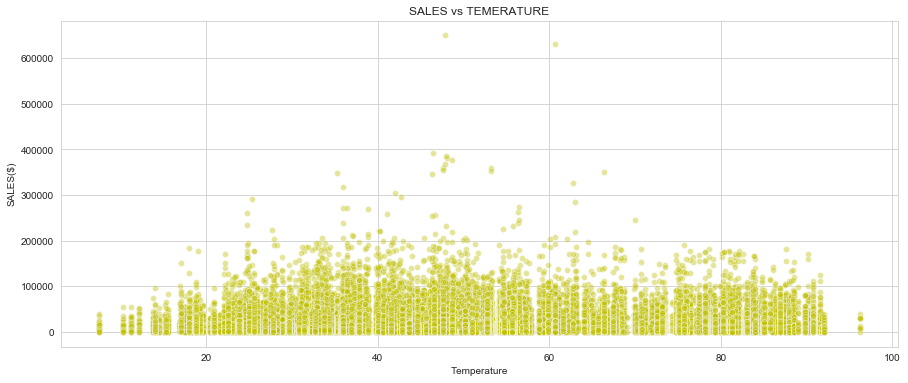

In [38]:
# Total Sales Overtime
plt.figure(figsize=(15,6));
sns.scatterplot('Temperature', 'Weekly_Sales', data=train_df, alpha=0.4, color='y');
plt.title("SALES vs TEMERATURE");
plt.ylabel('SALES($)');

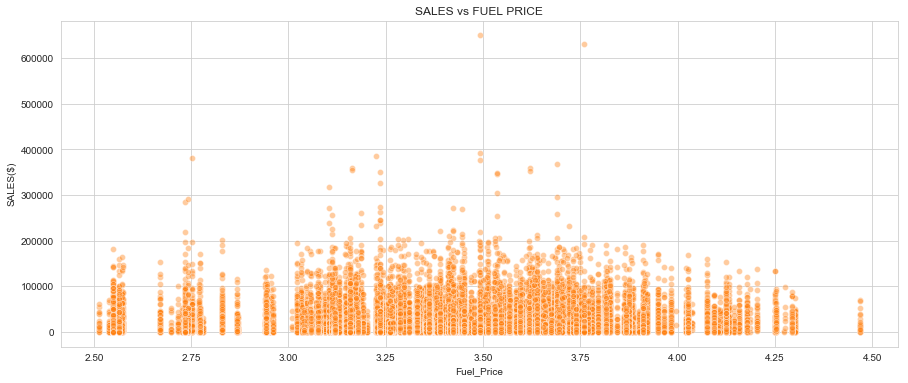

In [39]:
plt.figure(figsize=(15,6));
sns.scatterplot('Fuel_Price', 'Weekly_Sales', data=train_df, alpha=0.4, color='C1');
plt.title("SALES vs FUEL PRICE");
plt.ylabel('SALES($)');

### `STORE SALES vs STORE TYPE`

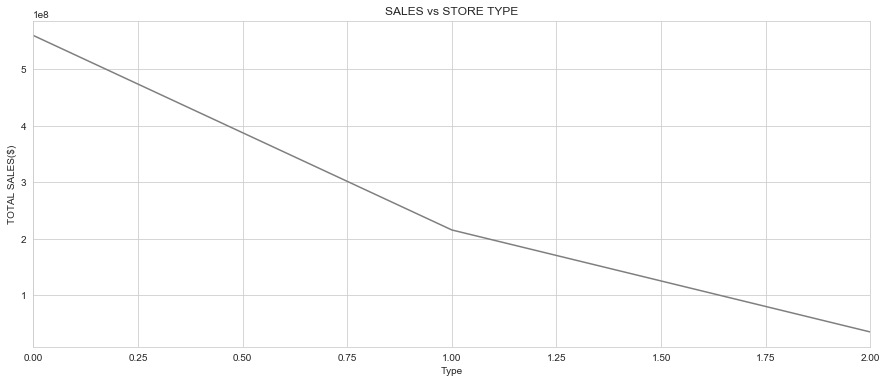

In [40]:
# Total Sales Overtime
plt.figure(figsize=(15,6));
train_df.groupby('Type').Weekly_Sales.sum().plot(color='C7');
plt.title("SALES vs STORE TYPE");
plt.xticks(labels=None)
plt.ylabel('TOTAL SALES($)');

### `SALES VS MARKDOWNS`

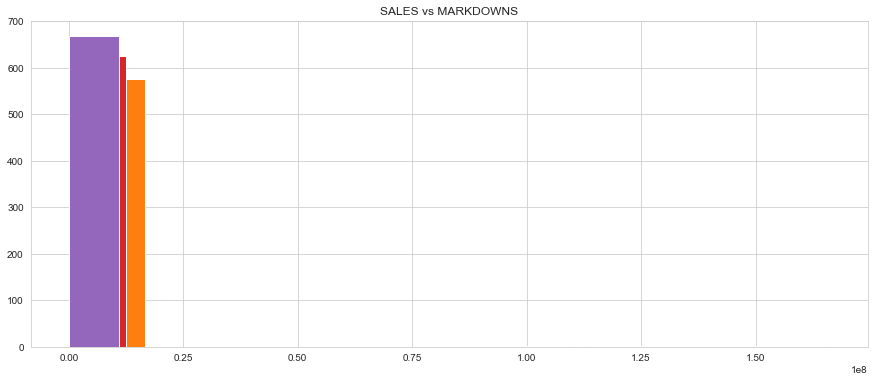

In [41]:
plt.figure(figsize=(15,6));
train_df.groupby('MarkDown1').Weekly_Sales.sum().hist(bins=10);
train_df.groupby('MarkDown2').Weekly_Sales.sum().hist(bins=10);
train_df.groupby('MarkDown3').Weekly_Sales.sum().hist(bins=10);
train_df.groupby('MarkDown4').Weekly_Sales.sum().hist(bins=10);
train_df.groupby('MarkDown5').Weekly_Sales.sum().hist(bins=10);
plt.title('SALES vs MARKDOWNS');

In [42]:
# Drop features as they are not important
train_df.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis=1, inplace=True)
test_df.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis=1, inplace=True)

### `SALES FOR STOES AND DEPARTMENT`

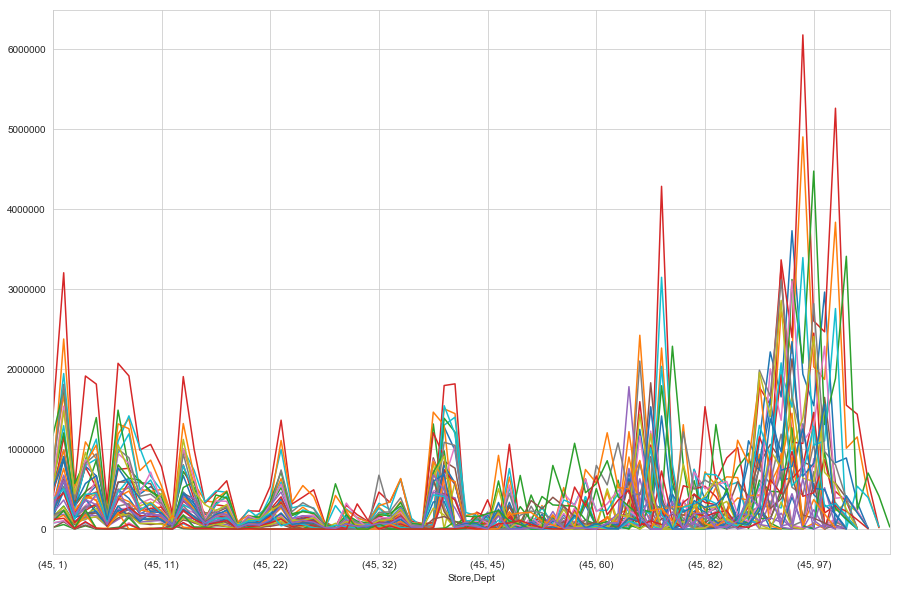

In [43]:
plt.figure(figsize=(15,10));
for x in train_df.Store.unique():
    train_df[train_df.Store==x].groupby(['Store', 'Dept']).Weekly_Sales.sum().plot();

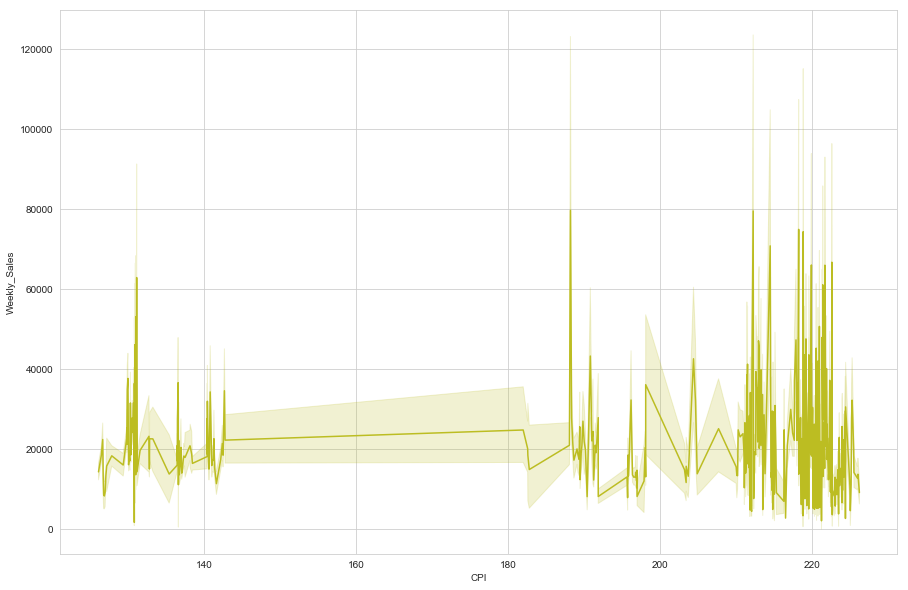

In [44]:
plt.figure(figsize=(15,10));
sns.lineplot(train_df.CPI, train_df.Weekly_Sales, color='C8');

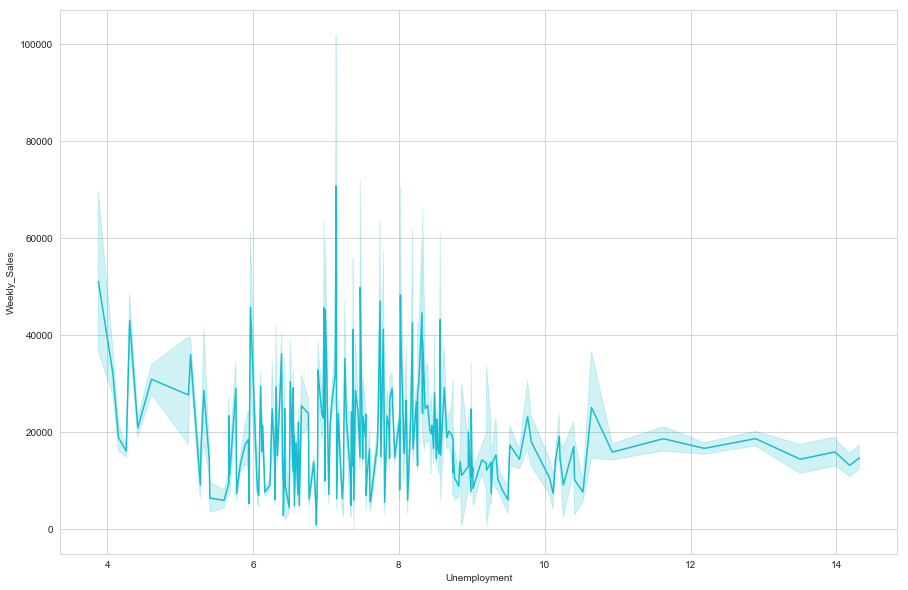

In [45]:
plt.figure(figsize=(15,10));
sns.lineplot(train_df.Unemployment, train_df.Weekly_Sales, color='C9');

### `FEATURE SELECTION`

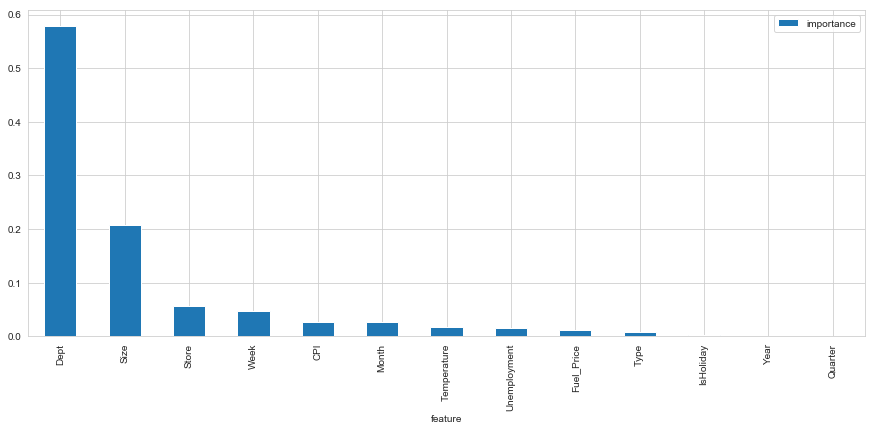

In [46]:
from sklearn.ensemble import RandomForestRegressor

samplecols = train_df.drop(['Weekly_Sales'], axis=1).columns.values

X = train_df.drop(['Weekly_Sales'], axis=1)
y = train_df.Weekly_Sales

rfc = RandomForestRegressor(random_state=11);

# fit random forest classifier on the training set
rfc.fit(X, y);

# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':samplecols ,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances = importances

# plot importances
plt.rcParams['figure.figsize'] = (15, 6)
importances.plot.bar();

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
import itertools

rfc = RandomForestRegressor(random_state=11)

# create the RFE model and select 10 attributes
rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X, y)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), samplecols)]
selected_features = [v for i, v in feature_map if i==True]
selected_features

['Store',
 'Dept',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment',
 'Type',
 'Size',
 'Month',
 'Week']

In [48]:
selected_features = ['Store', 'Dept', 'Type', 'Size', 'Month', 'Week']

imp_train = train_df[selected_features]
imp_train['Weekly_Sales'] = train_df.Weekly_Sales

imp_test = test_df[selected_features]

### `DUMMY VARIABLE`

In [49]:
train_dummy_df = pd.get_dummies(data = imp_train, columns=['Store', 'Dept', 'Type'], drop_first=True)
test_dummy_df = pd.get_dummies(data = imp_test, columns=['Store', 'Dept', 'Type'], drop_first=True)

### `TEST TRAIN SPLIT`

In [50]:
from sklearn.model_selection import train_test_split

X = train_dummy_df.drop('Weekly_Sales', axis=1) 
y = train_dummy_df.Weekly_Sales

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

### `MODELS`

***************************** Results *****************************
DecisionTreeRegressor
R2: 93.2748%
RMSE: 7.036e+03
Time taken by DecisionTreeRegressor Regressor: 0:00:00.642526
RandomForestRegressor
R2: 93.6069%
RMSE: 6.86e+03
Time taken by RandomForestRegressor Regressor: 0:00:03.655017
AdaBoostRegressor
R2: -35.1265%
RMSE: 3.154e+04
Time taken by AdaBoostRegressor Regressor: 0:00:07.941436
GradientBoostingRegressor
R2: 72.3768%
RMSE: 1.426e+04
Time taken by GradientBoostingRegressor Regressor: 0:00:04.242003
XGBRegressor
R2: 73.0208%
RMSE: 1.409e+04
Time taken by XGBRegressor Regressor: 0:00:14.431325
KNeighborsRegressor
R2: 19.4005%
RMSE: 2.436e+04
Time taken by KNeighborsRegressor Regressor: 0:00:01.578645
LinearRegression
R2: 65.3831%
RMSE: 1.596e+04
Time taken by LinearRegression Regressor: 0:00:00.187462


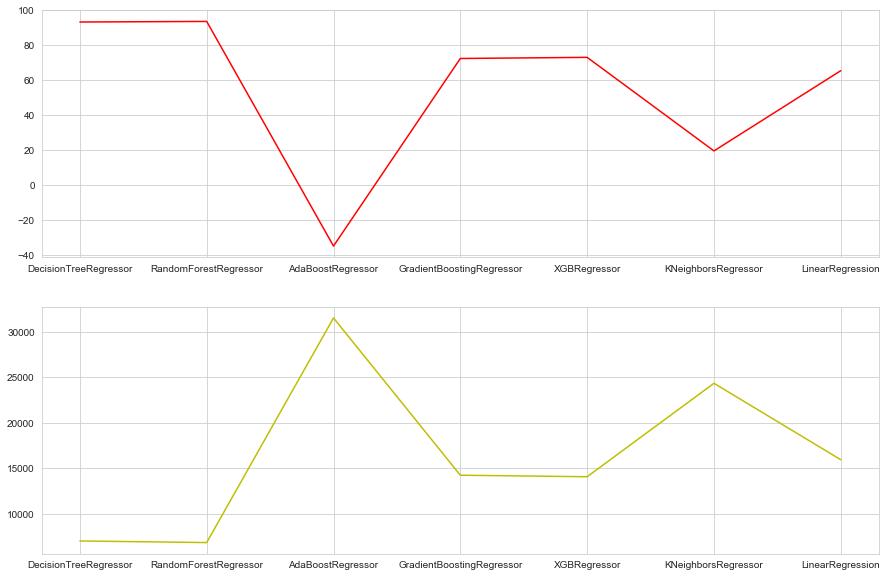

In [51]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
import datetime

regressors = [DecisionTreeRegressor(max_features = 0.7, random_state=11),
               RandomForestRegressor(max_features = 0.7, random_state=11),
               AdaBoostRegressor(random_state=11),
               GradientBoostingRegressor(max_features = 0.7, random_state=11),
               XGBRegressor(max_features = 0.7, random_state=11),
               KNeighborsRegressor(n_neighbors=10),
               LinearRegression()]

# Logging for Visual Comparison
log_cols=["regressors", "r2", "rmse"]
log = pd.DataFrame(columns=log_cols)

print('***************************** Results *****************************')
for clf in regressors:
    # logging start time
    start = datetime.datetime.now()
    
    clf.fit(x_train, y_train)
    name = clf.__class__.__name__
    
    print("="*70)
    print(name)
    
    train_predictions = clf.predict(x_test)
    r2 = r2_score(y_test, train_predictions)
    rmse = np.sqrt(mean_squared_error(y_test, train_predictions))
    print("R2: {:.4%}".format(r2))
    print("RMSE: {:.4}".format(rmse))
    
    end = datetime.datetime.now()
    
    print(f'Time taken by {name} Regressor: {end-start}')
    
    # Appending to the dataframe
    log_entry = pd.DataFrame([[name, r2, rmse]], columns=log_cols)
    log = log.append(log_entry)
    
    
print("="*70)

# Various models performance plot
log.set_index('regressors', inplace=True)

plt.rcParams['figure.figsize'] = (15, 10)
fig, ax = plt.subplots(2, 1)
ax[0].plot(log['r2']*100, color='r');
ax[1].plot(log['rmse'], color ='y');
plt.show()

### `MODEL PERFORMANCE ON HOLDOUT SET`

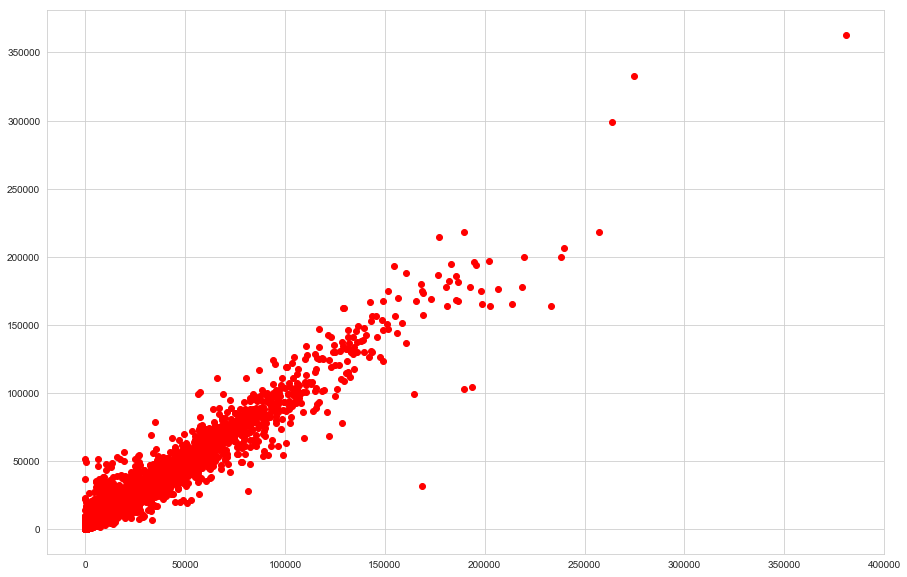

In [52]:
reg = RandomForestRegressor(n_estimators=100, random_state=11)
reg.fit(x_train, y_train)

#Performance on the test data sets
YHatTest = reg.predict(x_test)
plt.plot(y_test, YHatTest, 'ro')
# plt.plot(YHatTest, 'bo')
plt.show()

### `MAKING PREDICTIONS ON TEST DATA`

In [53]:
predictions = reg.predict(test_dummy_df)
test_df['Weekly_Sales'] = predictions

In [54]:
test_df.head()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Year,Quarter,Month,Week,Weekly_Sales
Date,,,,,,,,,,,,,,
2012-11-02,1,1,0,55.32,3.386,223.462779,6.573,0,151315,2012,4,11,44,16682.319883
2012-11-02,1,2,0,55.32,3.386,223.462779,6.573,0,151315,2012,4,11,44,45582.746980
2012-11-02,1,3,0,55.32,3.386,223.462779,6.573,0,151315,2012,4,11,44,9888.546425
2012-11-02,1,4,0,55.32,3.386,223.462779,6.573,0,151315,2012,4,11,44,39760.460017
2012-11-02,1,5,0,55.32,3.386,223.462779,6.573,0,151315,2012,4,11,44,28741.550900


### `PLOTS FOR TEST PREDICTIONS`

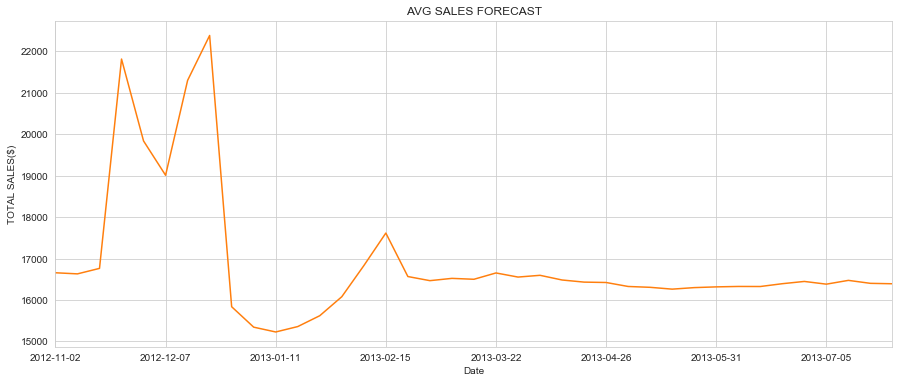

In [55]:
# Total Sales Overtime
plt.figure(figsize=(15,6));
test_df.groupby(test_df.index).Weekly_Sales.mean().plot(color='C1');
plt.title("AVG SALES FORECAST");
plt.xticks(labels=None)
plt.ylabel('TOTAL SALES($)');

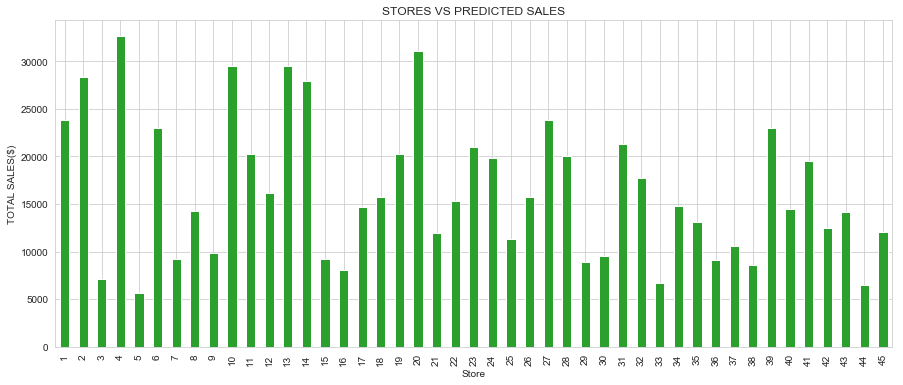

In [56]:
# Total Sales across various stores in descending order of sales
plt.figure(figsize=(15,6));
test_df.groupby('Store').Weekly_Sales.mean().plot(kind='bar', color='C2')
plt.title("STORES VS PREDICTED SALES");
plt.ylabel('TOTAL SALES($)');

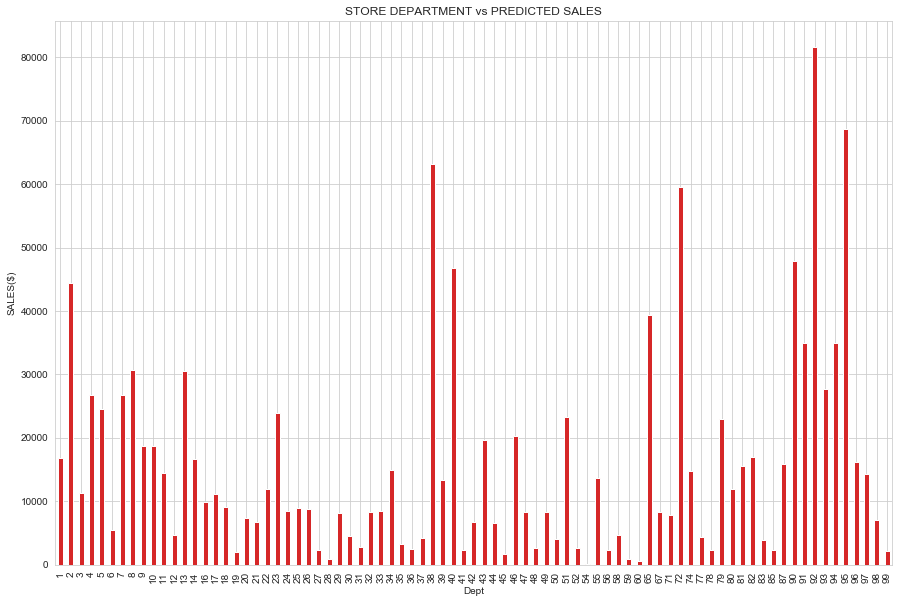

In [57]:
# Total Sales across various stores in descending order of sales
plt.figure(figsize=(15,10));
test_df.groupby('Dept').Weekly_Sales.mean().plot(kind='bar', color='C3')
plt.title("STORE DEPARTMENT vs PREDICTED SALES");
plt.ylabel('SALES($)');